In [1]:
import numpy as np
def drop_duplicates(x):
    is_unique = np.zeros_like(x, dtype=bool)
    is_unique[np.unique(x, return_index=True)[1]] = True
    return x[is_unique]

In [2]:
test1 = np.array([0,0,4,5,2,3,2,4,2])
a = drop_duplicates(test1)
print(a)
b = np.unique(test1, return_index=True)
print(b)

[0 4 5 2 3]
(array([0, 2, 3, 4, 5]), array([0, 4, 5, 2, 3]))


In [3]:
c = np.argsort(a)
print(c)
d = np.argsort(c)
print(d)
print(np.argsort(np.argsort(a)))

[0 3 4 1 2]
[0 3 4 1 2]
[0 3 4 1 2]


In [4]:
epsilon = 1e-4
bound = 1.0 - epsilon
factor = np.max(d) / 2.0 * bound
scaled_rank = np.clip(d/factor-bound, -bound, bound)
print(bound, factor, scaled_rank)
print(d/factor-bound)


0.9999 1.9998 [-9.99900000e-01  5.00250015e-01  9.99900000e-01 -4.99849995e-01
  2.00010001e-04]
[-9.99900000e-01  5.00250015e-01  1.00030002e+00 -4.99849995e-01
  2.00010001e-04]


In [5]:
from scipy.interpolate import interp1d
e = interp1d(
            a, scaled_rank, kind='linear', copy=False, fill_value='extrapolate')

In [6]:
e(a)

array([-9.99900000e-01,  5.00250015e-01,  9.99900000e-01, -4.99849995e-01,
        2.00010001e-04])

In [7]:
from gauss_rank_scaler import GaussRankScaler

In [8]:
import sys
print(sys.path)

['/Users/zijianzeng/PycharmProjects/Gauss_Rank_Scaler', '/Users/zijianzeng/opt/anaconda3/envs/tensorflow/lib/python37.zip', '/Users/zijianzeng/opt/anaconda3/envs/tensorflow/lib/python3.7', '/Users/zijianzeng/opt/anaconda3/envs/tensorflow/lib/python3.7/lib-dynload', '', '/Users/zijianzeng/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages', '/Users/zijianzeng/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/extensions', '/Users/zijianzeng/.ipython']


In [9]:
import pandas as pd

In [10]:
from sklearn.datasets import load_boston

In [11]:
%matplotlib inline
bunch = load_boston()

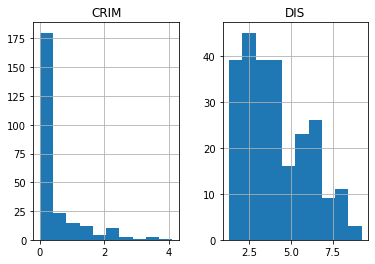

In [12]:
X_train = pd.DataFrame(bunch.data[:250], columns=bunch.feature_names)
X_test = pd.DataFrame(bunch.data[250:], columns=bunch.feature_names)

# plot histograms of two numeric variables
_ = X_train[['CRIM', 'DIS']].hist()

In [13]:
scaler = GaussRankScaler()

In [18]:
X_train_new = scaler.fit_transform(X_train[['CRIM', 'DIS']])

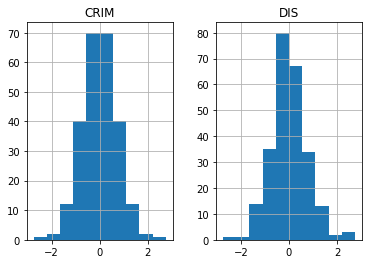

In [19]:
_ = pd.DataFrame(X_train_new, columns=['CRIM', 'DIS']).hist()

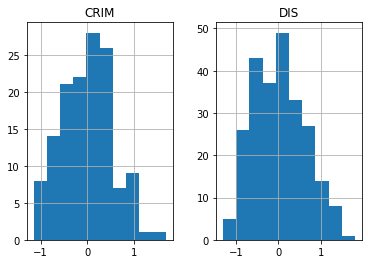

In [20]:
X_test_new = scaler.transform(X_test[['CRIM', 'DIS']])
_ = pd.DataFrame(X_test_new, columns=['CRIM', 'DIS']).hist()